# Simple Bayesian Inferences

We'll try out a few simple Bayes problems to get a sense of how the posterior depends on the prior, the likelihood, and the samples we generate.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We'll start with an exponential distribution, where no MVUE exists. Bayesian estimates are relatively straightforward, however!

In [2]:
alpha = 1 #prior value
theta = 4 #Set the rate of the exponential distribution

theta_max = 10
NUM_POINTS = 100

theta_values = np.linspace(0,theta_max,NUM_POINTS)
p_theta = np.exp(-alpha*theta_values)

[ 0.2563126   0.19472438  0.0162577   0.03366014  0.30782044  0.34581086
  0.41271811  0.08666747  0.00601392  0.24040221  0.02231575  0.22365985
  0.07696773  0.11111089  0.26128273  0.21185381  0.07098571  0.71002532
  0.18332346  0.2205441   0.19446875  0.09357008  0.41675295  0.13633252
  0.11950915  0.18158304  0.03743244  0.12210047  0.33079297  0.12960987
  0.08808338  0.81346036  0.11904671  0.01241227  0.75432357  0.02696724
  0.62218691  0.00986038  0.53186607  0.28439654  0.00424447  0.05791581
  0.5580654   0.81640949  0.11649933  0.64274274  0.04518691  0.29113629
  0.27910777  0.12772604]


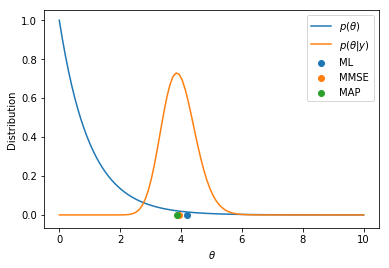

In [11]:
plt.plot(theta_values,p_theta)

n = 50
y = np.random.exponential(1/theta,n)
y_sum = np.sum(y)

y_ML = n/y_sum
y_MMSE = (n+1)/(alpha + y_sum)
y_MAP = (n)/(alpha + y_sum)

print(y)
plt.scatter(y_ML,0)
plt.scatter(y_MMSE,0)
plt.scatter(y_MAP,0)

p_theta_y = theta_values**n*np.exp(-theta_values*(y_sum + alpha))/((y_sum + alpha)**(-(n+1))*np.math.factorial(n))
plt.plot(theta_values,p_theta_y)

plt.legend(['$p(θ)$','$p(θ|y)$','ML','MMSE','MAP'])
plt.xlabel('$θ$')
plt.ylabel('Distribution')
plt.show()

As we add more and more samples, the posterior distribution tightens around the true value of theta. Note also that all three estimates increasingly coincide as n increases. The more data we have, the less the prior matters, and the less the difference between the MAP and MMSE estimates.

Next, let's try out a Gaussian example.

In [2]:
sigma_2m = 1
sigma_2 = 1
mu = np.sqrt(sigma_2m)*np.random.randn()

mu_max = 5
NUM_POINTS = 100

mu_values = np.linspace(-mu_max,mu_max,NUM_POINTS)
p_mu = 1/(np.sqrt(2*np.pi*sigma_2m))*np.exp(-1/(2*sigma_2m)*mu_values**2)

0.4327076855


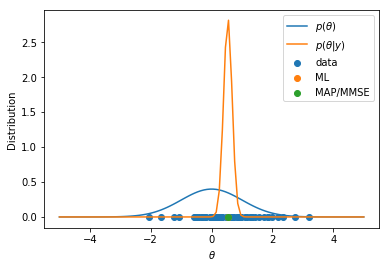

In [7]:
n = 50
y = mu + np.sqrt(sigma_2)*np.random.randn(n)
y_mean = np.mean(y)

y_ML = y_mean
y_MMSE = sigma_2m/(sigma_2m+sigma_2/n)*y_mean
sigma_2my = 1/(n/sigma_2 + 1/sigma_2m)

plt.scatter(y,np.zeros(len(y)))
plt.scatter(y_ML,0)
plt.scatter(y_MMSE,0)

p_mu_y = 1/(np.sqrt(2*np.pi*sigma_2my))*np.exp(-1/(2*sigma_2my)*(mu_values-y_MMSE)**2)

print(mu)
plt.plot(mu_values,p_mu)
plt.plot(mu_values,p_mu_y)

plt.legend(['$p(θ)$','$p(θ|y)$','data','ML','MAP/MMSE'])
plt.xlabel('$θ$')
plt.ylabel('Distribution')
plt.show()